In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests


# 1-Gather

In [2]:

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv',mode ='wb') as file :
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [4]:
tweets = pd.read_json('tweet-json',lines=True)

# 2-Assess

## 1- twitter archive data

In [5]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
1848,675798442703122432,NaN,NaN,2015-12-12 22:04:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He just touched a boob for the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675798442...,10,10,Bernie,None,None,None,None
662,790987426131050500,NaN,NaN,2016-10-25 18:44:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She has a cowboy hat on her nos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790987426...,12,10,Misty,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
2090,670786190031921152,NaN,NaN,2015-11-29 02:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Creg. You offered him a ride to work b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670786190...,8,10,Creg,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
364,829141528400556032,NaN,NaN,2017-02-08 01:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He goes from sneaky tongue sl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829141528...,12,10,Malcolm,None,None,None,None
1841,675878199931371520,NaN,NaN,2015-12-13 03:21:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Ok, I'll admit this is a pretty adorable bunny...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675878199...,11,10,None,None,None,None,None
834,768473857036525572,NaN,NaN,2016-08-24 15:43:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chevy. He had a late breakfast and now ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768473857...,11,10,Chevy,None,None,None,None
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,None,None,pupper,None


In [9]:
sum(twitter_archive.duplicated())

0

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## 2-image predictions data

In [13]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
2048,886983233522544640,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,2,Chihuahua,0.793469,True,toy_terrier,0.143528,True,can_opener,0.032253,False
753,688179443353796608,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,1,sorrel,0.811520,False,horse_cart,0.024820,False,Arabian_camel,0.015155,False
1751,824297048279236611,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False,jigsaw_puzzle,0.028910,False,doormat,0.022251,False
296,671362598324076544,https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg,1,tub,0.393616,False,bathtub,0.383522,False,swimming_trunks,0.077301,False
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True
622,680497766108381184,https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg,1,Chihuahua,0.538354,True,muzzle,0.084289,False,ski_mask,0.076690,False
1048,713411074226274305,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1,Great_Pyrenees,0.720337,True,Samoyed,0.129542,True,kuvasz,0.122451,True
980,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,Bernese_mountain_dog,0.979235,True,Shetland_sheepdog,0.011037,True,Appenzeller,0.003971,True
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/69310...,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True


In [17]:
sum(image_predictions.duplicated())

0

## 3-tweets data

In [18]:
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [19]:
tweets.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2349,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",111,False,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,0.0,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2350,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",311,False,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,0.0,NaN,NaN,NaN,147,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2351,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",128,False,Here is a very happy pup. Big fan of well-main...,NaN,...,0.0,NaN,NaN,NaN,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2352,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",132,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,0.0,NaN,NaN,NaN,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2353,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2535,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,0.0,NaN,NaN,NaN,532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [20]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [21]:
tweets.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1273,NaN,NaN,2016-03-14 00:49:23,"[0, 83]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2213,False,This is Sammy. He's in a tree. Very excited ab...,NaN,...,0.0,NaN,NaN,NaN,763,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1658,NaN,NaN,2016-01-02 00:14:32,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 683078878106005505, 'id_str'...",2176,False,Here we see a nifty leaping pupper. Feet look ...,NaN,...,0.0,NaN,NaN,NaN,634,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
927,NaN,NaN,2016-07-17 01:05:25,"[0, 56]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 754481405627957248, 'id_str'...",5852,False,This is Milo. He's currently plotting his reve...,NaN,...,0.0,NaN,NaN,NaN,2220,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
297,NaN,NaN,2017-03-01 18:52:06,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 837011338056597504, 'id_str'...",0,False,RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,NaN,...,0.0,NaN,NaN,NaN,88,False,{'created_at': 'Wed Mar 01 18:47:10 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
133,NaN,NaN,2017-05-22 16:06:55,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 866686816879087618, 'id_str'...",20070,False,This is Lili. She can't believe you betrayed h...,NaN,...,0.0,NaN,NaN,NaN,3727,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
933,NaN,NaN,2016-07-14 01:19:12,"[0, 55]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 753398183879991296, 'id_str'...",6384,False,This is Scout. Her batteries are low. 12/10 pr...,NaN,...,0.0,NaN,NaN,NaN,2186,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1837,NaN,NaN,2015-12-13 04:14:39,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675891545124421633, 'id_str'...",2297,False,This is Donny. He's summoning the demon monste...,NaN,...,0.0,NaN,NaN,NaN,976,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1548,NaN,NaN,2016-01-18 18:36:07,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689154306549792769, 'id_str'...",3348,False,We normally don't rate birds but I feel bad co...,NaN,...,0.0,NaN,NaN,NaN,1128,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1538,NaN,NaN,2016-01-20 04:03:02,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689659367294136321, 'id_str'...",11394,False,This is Ricky. He's being escorted out of the ...,NaN,...,0.0,NaN,NaN,NaN,4412,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1737,NaN,NaN,2015-12-23 03:58:25,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 679511347441328128, 'id_str'...",3711,False,Say hello to William. He makes fun of others b...,NaN,...,0.0,NaN,NaN,NaN,1461,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [22]:
tweets.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


### quality

#### twitter archive data
- 181 retweetes and we want only tweets
- 78 reply to tweets and we need only tweets
- some unuseful columns in the table : in_reply_to_status_id ,retweeted_status_id,in_reply_to_user_id , retweeted_status_user_id ,retweeted_status_timestamp
- missing values in expanded_urls column
- None instead of NaN in (doggo,floofer,pupper,puppo) columns
- rating_denominator column values >10
- too large rating_numerator values
- data type of timestamp should be timestamp instead of str
- data type of tweet_id should be str instead of int
- rename (text,name) with descriptive names
- incorrect dog names (some names consist of only one or two letters and some others begin with lower case letters
- extract source from url

#### image predictions

- tweet_id data type should be str instead of int

##### tweets data
- delete unwanted columns(we need only id_str,retweet_count and favorite_count )
- rename id str with descriptive name
- id str datatype is int instead of str

### Tidiness
#### twitter archive data
- all values of rating_denominator column will be 10 so its not useful we need only rating_numerator for analysis 
- merge (doggo,floofer,pupper,puppo) columns in one column (dog_stage) and change the data type to categorical
- after concatenating dog stages (doggo,floofer,pupper,puppo) columns should be deleted

#### image prediction
- p1,p2,p3 are multiple coulmns that represent the same variable
- p1_conf,p2_conf,p3_conf are multiple coulmns that represent the same variable
- p1_dog, p2_dog,p3_dog are multiple coulmns that represent the same variable
- merge image prediction with twitter archive data

#### tweets data
- merge tweets data with twitter archive data

 # 3-Cleaning

In [23]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_clean = tweets.copy()

##### define
 * 181 retweets must be deleted
 * 78 reply must be deleted

##### code


In [24]:
twitter_archive_clean =twitter_archive_clean[ twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean =twitter_archive_clean[ twitter_archive_clean.in_reply_to_status_id.isnull()]

##### test

In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

##### define
drop unuseful columns in the table : in_reply_to_status_id ,retweeted_status_id,in_reply_to_user_id , retweeted_status_user_id ,retweeted_status_timestamp


##### code

In [26]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                            'retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp'], axis = 1,inplace = True)

##### test

In [27]:
d =list(twitter_archive_clean)
d

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### define
drop NaN values in expanded_urls column

##### code

In [28]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

##### test

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


##### define
replace None by NaN in (doggo,floofer,pupper,puppo) columns

##### code

In [30]:
twitter_archive_clean['doggo'].replace('None', np.nan, inplace=True)
twitter_archive_clean['floofer'].replace('None', np.nan, inplace=True)
twitter_archive_clean['pupper'].replace('None', np.nan, inplace=True)
twitter_archive_clean['puppo'].replace('None', np.nan, inplace=True)

##### test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 83 non-null object
floofer               10 non-null object
pupper                229 non-null object
puppo                 24 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


##### define
some rating_denominator values more than or less than l0 with too large rating_numerator so i will fix inaccurate values in both.

##### code

In [32]:
# fixing rating denominator
twitter_archive_clean.loc[(twitter_archive_clean.rating_denominator > 10) |
                          (twitter_archive_clean.rating_denominator < 10), "rating_denominator"] = 10
# fixing rating numerator
twitter_archive_clean.loc[ twitter_archive_clean.rating_numerator > 15, "rating_numerator"] = 10


##### test

In [33]:
twitter_archive_clean.rating_denominator.value_counts()


10    2094
Name: rating_denominator, dtype: int64

In [34]:
twitter_archive_clean.rating_numerator.value_counts()

12    485
10    452
11    413
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

##### define
- data type of timestamp should be timestamp instead of str
- data type of tweet_id should be str instead of int

##### code

In [35]:
# convert timestamp to date time
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])

# convert tweet id to string
twitter_archive_clean['tweet_id']=twitter_archive_clean ['tweet_id'].astype(str)

##### test

In [36]:
twitter_archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

##### define
rename (text,name,rating_numerator) with descriptive names

##### code

In [37]:
twitter_archive_clean.rename(columns = {'name':'dog_name',
                                        'text':'tweet_text',
                                        'rating_numerator':'ratings'}, inplace = True)

##### test

In [38]:
d = list(twitter_archive_clean)
d

['tweet_id',
 'timestamp',
 'source',
 'tweet_text',
 'expanded_urls',
 'ratings',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### define
 replace incorrect dog names with None

##### code

In [39]:
twitter_archive_clean['dog_name']=twitter_archive_clean['dog_name'].replace( '^[a-z]+$',  'None', regex = True) 

##### test

In [40]:
twitter_archive_clean['dog_name'].value_counts()

None         704
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Toby           7
Daisy          7
Bella          6
Oscar          6
Bailey         6
Bo             6
Stanley        6
Jax            6
Koda           6
Dave           5
Louis          5
Chester        5
Scout          5
Milo           5
Bentley        5
Buddy          5
Rusty          5
Leo            5
Larry          4
Clarence       4
            ... 
Bobble         1
Snoopy         1
Acro           1
Grizzie        1
Skittle        1
Storkson       1
Ulysses        1
Brian          1
Eve            1
Leonidas       1
Grizz          1
Mack           1
Livvie         1
Blanket        1
Mason          1
Remy           1
Schnitzel      1
Walker         1
Thor           1
Furzey         1
Liam           1
Sunshine       1
Sojourner      1
Emmy           1
Tom            1
Antony         1
Balto          1
Mary          

##### define
extract source from url

##### code

In [41]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

##### test

In [42]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

#####  define tidiness
all values of rating_denominator column will be 10 so it is not representing any useful  variable
  we need only rating_numerator for analysis 

##### code

In [43]:
twitter_archive_clean.drop(['rating_denominator'], axis = 1,inplace = True)

##### test

In [44]:
l= list(twitter_archive_clean)
l

['tweet_id',
 'timestamp',
 'source',
 'tweet_text',
 'expanded_urls',
 'ratings',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### define tidiness
-  concatenate (doggo,floofer,pupper,puppo) columns in one column (dog_stage) 
-  change the data type of dog_stage to categorical
-  after concatenating dog stages (doggo,floofer,pupper,puppo) columns should be deleted

In [45]:
#concatenate column values
twitter_archive_clean["dog_stage"] = twitter_archive_clean["doggo"].fillna("") \
                                    +twitter_archive_clean ["floofer"].fillna("") \
                                    +twitter_archive_clean ["pupper"].fillna("")  \
                                    +twitter_archive_clean ["puppo"].fillna("")

#replace empty values with NaN
twitter_archive_clean["dog_stage"].replace("",np.nan,inplace=True)  

# adding comma between multiple values
twitter_archive_clean["dog_stage"].replace("doggopupper","doggo , pupper",inplace=True)
twitter_archive_clean["dog_stage"].replace("doggopuppo","doggo , puppo",inplace=True)
twitter_archive_clean["dog_stage"].replace("doggofloofer","doggo , floofer",inplace=True)

#convert to cateory datatype
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

#drop unuseful coulmns
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1,inplace = True)


##### test

In [46]:
twitter_archive_clean.dog_stage.value_counts()

pupper             220
doggo               72
puppo               23
floofer              9
doggo , pupper       9
doggo , puppo        1
doggo , floofer      1
Name: dog_stage, dtype: int64

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2094 non-null object
timestamp        2094 non-null datetime64[ns]
source           2094 non-null object
tweet_text       2094 non-null object
expanded_urls    2094 non-null object
ratings          2094 non-null int64
dog_name         2094 non-null object
dog_stage        335 non-null category
dtypes: category(1), datetime64[ns](1), int64(1), object(5)
memory usage: 133.3+ KB


##### define
 change tweet_id data type from int to str

##### code

In [48]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')

##### test

In [49]:
image_predictions_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

##### define tidiness
- p1,p2,p3 are multiple coulmns that represent the same variable
- p1_conf,p2_conf,p3_conf are multiple coulmns that represent the same variable
- p1_dog, p2_dog,p3_dog are multiple coulmns that represent the same variable
  - so breed and confidence of dogs only should be selected 

##### code

In [50]:
# list of conditions for selection
condition_list = [(image_predictions_clean['p1_dog'] == True),
                  (image_predictions_clean['p2_dog'] == True),
                  (image_predictions_clean['p3_dog'] == True)]

# list of choice order based on the selection conditions for predicted breed
choices_breed = [image_predictions_clean['p1'], 
                 image_predictions_clean['p2'],
                 image_predictions_clean['p3']]

# list of choice order for confidence level based on the selection conditions
choices_confidence = [image_predictions_clean['p1_conf'], 
                      image_predictions_clean['p2_conf'], 
                      image_predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
image_predictions_clean['breed'] = np.select(condition_list, choices_breed, default = 'none')

# select the predicted confidence level based on the first successful condition
image_predictions_clean['confidence'] = np.select(condition_list, choices_confidence, default = 0)

#delete rows with breed none and confidence zero (not a dogs)
image_predictions_clean = image_predictions_clean.query('breed != "none"')

#set breed as categorical datatype
image_predictions_clean["breed"] = image_predictions_clean['breed'].astype('category')


In [51]:
#delete unuseful coulmns
image_predictions_clean.drop(['p1','p2','p3','p1_conf','p2_conf',
                              'p3_conf','p1_dog','p2_dog','p3_dog'], axis = 1,inplace = True)

##### test

In [52]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,breed,confidence
1790,830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713
905,700151421916807169,https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg,1,Italian_greyhound,0.176838
661,682429480204398592,https://pbs.twimg.com/media/CXh5_dDWQAIbU-J.jpg,1,whippet,0.594701
890,699323444782047232,https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg,1,Labrador_retriever,0.309696
999,708479650088034305,https://pbs.twimg.com/media/CdUGcLMWAAI42q0.jpg,1,Shih-Tzu,0.218479
856,696754882863349760,https://pbs.twimg.com/media/Cate3eLUcAEIuph.jpg,1,toy_poodle,0.098378
1156,733460102733135873,https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg,1,chow,0.931275
1239,746872823977771008,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1,Pembroke,0.540201
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442
1734,821522889702862852,https://pbs.twimg.com/media/C2aitIUXAAAG-Wi.jpg,1,Doberman,0.763539


In [53]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id      1751 non-null object
jpg_url       1751 non-null object
img_num       1751 non-null int64
breed         1751 non-null category
confidence    1751 non-null float64
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 76.0+ KB


##### define
delete unwanted columns in tweets dataframe

##### code

In [54]:
tweets_clean =tweets_clean[['id_str','favorite_count','retweet_count']]

##### test

In [55]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


##### define
rename id str with descriptive name

##### code

In [56]:
tweets_clean.rename(columns ={'id_str':'tweet_id'} ,inplace=True)

##### test

In [57]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


##### define
change tweet id datatype to string

##### code

In [58]:
tweets_clean['tweet_id']= tweets_clean['tweet_id'].astype(str)

##### test

In [59]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


##### define
merge tweet table with twitter archive data

##### code

In [60]:
twitter_archive_clean = pd.merge(twitter_archive_clean,tweets_clean ,
                         on = 'tweet_id', how = 'inner')

##### test

In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 1368
Data columns (total 10 columns):
tweet_id          1369 non-null object
timestamp         1369 non-null datetime64[ns]
source            1369 non-null object
tweet_text        1369 non-null object
expanded_urls     1369 non-null object
ratings           1369 non-null int64
dog_name          1369 non-null object
dog_stage         225 non-null category
favorite_count    1369 non-null int64
retweet_count     1369 non-null int64
dtypes: category(1), datetime64[ns](1), int64(3), object(5)
memory usage: 108.7+ KB


In [62]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,tweet_text,expanded_urls,ratings,dog_name,dog_stage,favorite_count,retweet_count
0,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,25461,4328
1,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,42908,8964
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,41048,9774
3,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,None,NaN,20562,3261
4,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,None,NaN,56848,16716


##### define
merge image prediction with twitter archive data

##### code

In [63]:
twitter_archive_clean = pd.merge(twitter_archive_clean,image_predictions_clean ,
                         on = 'tweet_id', how = 'inner')

##### test

In [64]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 0 to 1085
Data columns (total 14 columns):
tweet_id          1086 non-null object
timestamp         1086 non-null datetime64[ns]
source            1086 non-null object
tweet_text        1086 non-null object
expanded_urls     1086 non-null object
ratings           1086 non-null int64
dog_name          1086 non-null object
dog_stage         169 non-null category
favorite_count    1086 non-null int64
retweet_count     1086 non-null int64
jpg_url           1086 non-null object
img_num           1086 non-null int64
breed             1086 non-null category
confidence        1086 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 118.7+ KB


In [65]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,tweet_text,expanded_urls,ratings,dog_name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,breed,confidence
0,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
1,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


##### define
replace nan values in dog_stage with none

##### code

In [66]:
twitter_archive_clean["dog_stage"].replace(np.nan,"None",inplace =True)

##### test

In [67]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,tweet_text,expanded_urls,ratings,dog_name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,breed,confidence
0,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
1,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086


In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 0 to 1085
Data columns (total 14 columns):
tweet_id          1086 non-null object
timestamp         1086 non-null datetime64[ns]
source            1086 non-null object
tweet_text        1086 non-null object
expanded_urls     1086 non-null object
ratings           1086 non-null int64
dog_name          1086 non-null object
dog_stage         1086 non-null object
favorite_count    1086 non-null int64
retweet_count     1086 non-null int64
jpg_url           1086 non-null object
img_num           1086 non-null int64
breed             1086 non-null category
confidence        1086 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 125.7+ KB


# 4-Store data
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

In [69]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

# 5-Analyze and  visualize data
the cleaned data out of wrangling process will be used in this section to answer some questions

In [70]:
rate_dogs =twitter_archive_clean.copy()

In [71]:
rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 0 to 1085
Data columns (total 14 columns):
tweet_id          1086 non-null object
timestamp         1086 non-null datetime64[ns]
source            1086 non-null object
tweet_text        1086 non-null object
expanded_urls     1086 non-null object
ratings           1086 non-null int64
dog_name          1086 non-null object
dog_stage         1086 non-null object
favorite_count    1086 non-null int64
retweet_count     1086 non-null int64
jpg_url           1086 non-null object
img_num           1086 non-null int64
breed             1086 non-null category
confidence        1086 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 125.7+ KB


In [72]:
rate_dogs.head()

,tweet_id,timestamp,source,tweet_text,expanded_urls,ratings,dog_name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,breed,confidence
0,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
1,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
3,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,None,None,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
4,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,None,None,56848,16716,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142


### 1-What is the time of the first and the last tweet in the data?

In [73]:
first = rate_dogs.timestamp.min()
last =  rate_dogs.timestamp.max()
print("time of the first tweet is : ",first)
print("time of the last tweet is  : ",last)

time of the first tweet is :  2015-11-15 23:05:30
time of the last tweet is  :  2017-07-31 00:18:03


### 2-What are the maximum , minimum and count of tweets ratings? 
### show  the ratings distribution.

In [74]:
min_rate = rate_dogs.ratings.min()
max_rate = rate_dogs.ratings.max()
count_rate = rate_dogs.ratings.count()

print("maximum rate is : ",max_rate)
print("minimum rate is : ",min_rate)
print("count of ratings : ",count_rate)


maximum rate is :  14
minimum rate is :  1
count of ratings :  1086


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


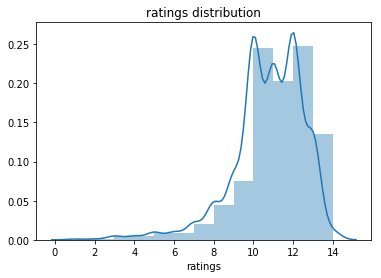

In [75]:
#set bin edges start and end
bin_edges = np.arange(1, rate_dogs['ratings'].max()+1, 1)

#plot histogram 
sns.distplot(rate_dogs['ratings'], bins = bin_edges);

#plot title 
plt.title("ratings distribution");

**most of ratings from 10 to 12**

### 3- What are the top 5 common dog names?

In [76]:
#execluding none
names = rate_dogs.dog_name.value_counts()[1:6].index.tolist()
print("the top 5 common dog names are : ",names)

the top 5 common dog names are :  ['Oliver', 'Tucker', 'Winston', 'Lucy', 'Penny']


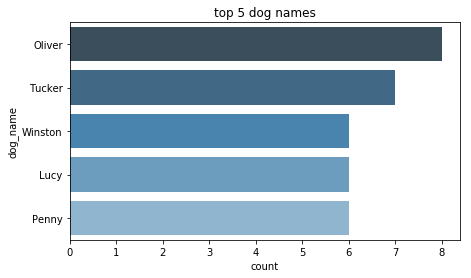

In [77]:
#size of the figure
plt.figure(figsize=(7,4))

# Count the frequency of each unique value in the dog_name column, and sort it in descending order
freq = rate_dogs.dog_name.value_counts()[1:6]

# Get the indexes of the Series
gen_order = freq.index

#plot a count plot using seaborn
sns.countplot(data= rate_dogs , y= "dog_name",  order = gen_order, palette='Blues_d' );

#plot title 
plt.title("top 5 dog names");

**Oliver is the most popular dog name in the tweets and secpnd one is Tucker, then penny,lucy and winston are equal**

### 4- What are dogs different stages? 
### and what is the most and least freq stage?

In [78]:
#excluding none
stages = rate_dogs.dog_stage.value_counts()[1:].index.tolist()
print("different stages are  : ",stages)   

different stages are  :  ['pupper', 'doggo', 'puppo', 'doggo , pupper', 'floofer', 'doggo , puppo', 'doggo , floofer']


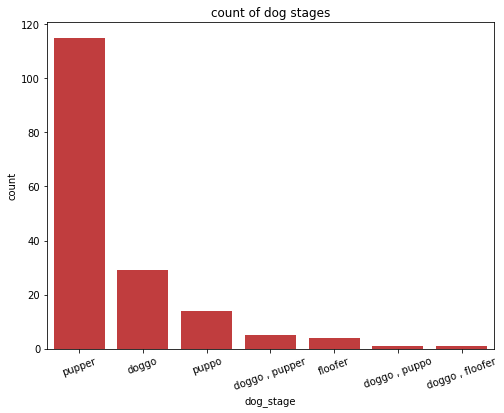

In [79]:
#The color_palette() returns the the current palette as a list of RGB tuples.
base_color = sns.color_palette()[3]

#size of the figure
plt.figure(figsize=(8,6))

# Count the frequency of each unique value in the dog_stage column, and sort it in descending order without none
freq = rate_dogs['dog_stage'].value_counts()[1:]

# Get the indexes of the Series
gen_order = freq.index

#plot a count plot using seaborn
sns.countplot(data= rate_dogs ,x="dog_stage", color=base_color, order = gen_order );

#plot title 
plt.title("count of dog stages");

# Use xticks to rotate the labels 
plt.xticks(rotation=20);

**'Pupper' is the most common dog stage and 'doggo,puppo' is the  least common**

### 5-What are the top 20 dog breeds ?
### show the top 20 dog breeds

In [80]:
breeds = rate_dogs.breed.value_counts()[:20].index.tolist()
print("the top 20 dogs breed are :", breeds)

the top 20 dogs breed are : ['golden_retriever', 'Pembroke', 'Labrador_retriever', 'Chihuahua', 'pug', 'Pomeranian', 'chow', 'toy_poodle', 'cocker_spaniel', 'French_bulldog', 'Chesapeake_Bay_retriever', 'Samoyed', 'malamute', 'Eskimo_dog', 'Cardigan', 'Shih-Tzu', 'beagle', 'miniature_pinscher', 'German_shepherd', 'Rottweiler']


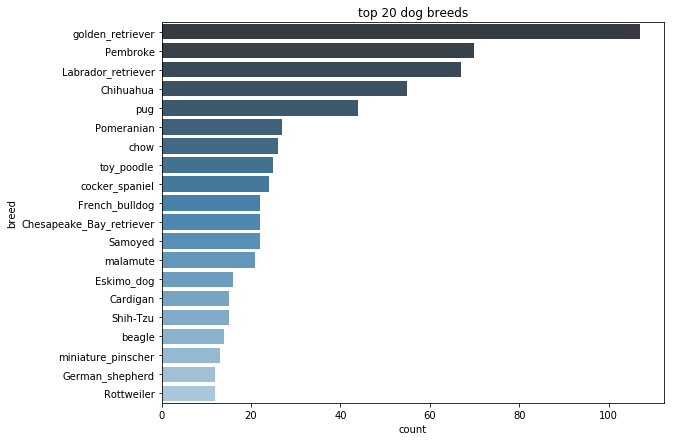

In [81]:
#figure size
plt.figure(figsize=(9,7))

# Count the frequency of each unique value in breed column, and sort it in descending order
freq = rate_dogs.breed.value_counts()[0:20]

# Get the indexes of the Series
breed_order = freq.index

#plot a count plot using seaborn
sns.countplot(data = rate_dogs , y= "breed",  order = breed_order,palette='Blues_d');

#plot title 
plt.title("top 20 dog breeds");

**golden retriever is the most common dog breed in tweets**

### 6- what is the relation between count of retweets and favorite count?

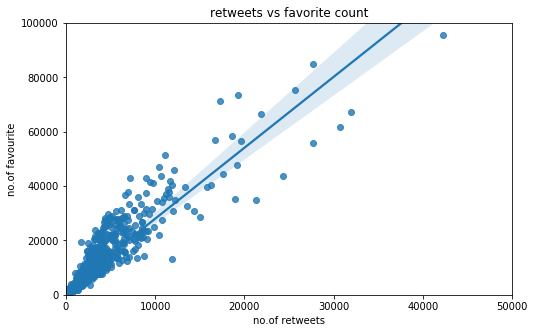

In [82]:
#size of the figure
plt.figure(figsize=(8,5))

#plotting scatter plot between retweets and favorite
sns.regplot(data = rate_dogs ,x = "retweet_count" , y = "favorite_count");

# x,y labels names
plt.xlabel('no.of retweets')
plt.ylabel('no.of favourite')

#limit x and y scale
plt.xlim(0, 50000);
plt.ylim(0, 100000);

#plot title 
plt.title("retweets vs favorite count");

**there is a strong positive relation between number of tweets and favorite tweets count and its expected because good tweets should be favorite tweet and have alot of retweets count**

### 7- what is the number of tweets ov er the year?

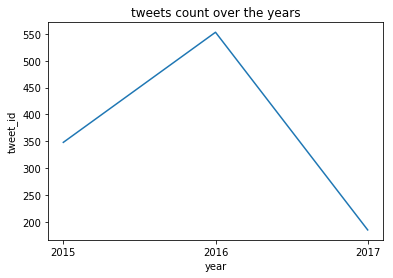

In [87]:
# extract years from timestamp
rate_dogs['year'] = rate_dogs['timestamp'].dt.year

# group counts of tweets by year
df = rate_dogs.groupby('year',as_index = False)["tweet_id"].count()

#plotting line chart
sns.lineplot(data= df, x = "year", y = "tweet_id");

# x ticks
ticks = [2015, 2016,2017]
plt.xticks(ticks);

plt.title("tweets count over the years");


**2016 has the highst number of tweets ,2017 has the lowest number of tweets**